<a href="https://colab.research.google.com/github/martinsgeorgesilva/topsis/blob/main/topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topsis disciplina: Processos Decisórios em Projetos de Transformação Digital e Indústria 4.0

[0.76659682 0.88367315 0.11286494 0.11286494 0.89286277]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


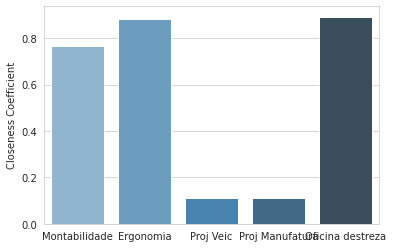

[0.78562925 0.66099579 0.21437075]


In [26]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

class TOPSIS:
      def __init__ (self,*args):
            nargs = len(args)
            if nargs == 0:
                  print ('ERROR: There is no parameter')
                  raise ValueError
            elif nargs == 1 or nargs == 2:
                  fileName = args[0]
                  try:
                        data = np.loadtxt(fileName, dtype=float)
                  except IOError:
                        print ('ERROR: there is a problem with the file. Please, check the name.')
                        raise IOError
                  if nargs == 1:
                        self.weights = np.asarray(data[0,:])
                        if self.weights.sum() != 1.0:
                              print ('ERROR: the sum of the weights must be 1')
                              raise ValueError
                        self.costBen = data[1,:].astype(int)
                        self.matrixD = np.asarray(data[2:,:])
                  else:
                        self.matrixD = np.asarray(data)
                        self.weights = np.asarray(args[0])
                        
                        if self.weights.sum() != 1.0:
                              print ('ERROR: the sum of the weights must be 1')
                              raise ValueError
                        self.costBen = args[1]
            elif nargs == 3:
                  # In this case, the parameters' order are: matrixD, weights and costBen
                  self.matrixD = np.asarray(args[0])
                  self.weights = np.asarray(args[1])
                  if self.weights.sum() != 1.0:
                              print ('ERROR: the sum of the weights must be 1')
                              raise ValueError
                  self.costBen = args[2]
            else:
                  print ('ERROR: The number of the parameters is wrong')
                  raise ValueError

            size = self.matrixD.shape            
            [self.nAlt, self.nCri] = size
            self.normMatrixD = np.zeros(size, dtype=float)
            self.idealPos = np.zeros (self.nCri, dtype=float)
            self.idealNeg = np.zeros (self.nCri, dtype=float)
            self.dPos = np.zeros (self.nAlt, dtype=float)
            self.dNeg = np.zeros (self.nAlt, dtype=float)
            self.rCloseness = np.zeros (self.nAlt, dtype=float)

      def normalizeMatrix (self):
            m = self.matrixD **2
            m = np.sqrt(m.sum(axis=0))

            for i in range(self.nAlt):
                  for j in range(self.nCri):
                        self.normMatrixD[i,j] = self.matrixD[i,j] / m[j]

            self.matrixD = self.normMatrixD

      def introWeights (self):
            self.normMatrixD = self.matrixD * self.weights

      def getIdealSolutions (self):
            mx = self.normMatrixD.max(axis=0)
            mi = self.normMatrixD.min(axis=0)
            for j in range(self.nCri):
                  if self.costBen[j] == 1:
                        self.idealPos[j] =mi[j]
                        self.idealNeg[j] = mx[j]
                  elif self.costBen[j] == 0:
                        self.idealPos[j] = mx[j]
                        self.idealNeg[j] = mi[j]
                  else:
                        print ('ERROR: The values of the cost and benefit must be 1 or 0')
                        raise ValueError

      def distanceToIdeal (self):
            for i in range(self.nAlt):
                  for j in range(self.nCri):
                        self.dPos[i] = self.dPos[i] + distance (self.normMatrixD[i,j], self.idealPos[j])
                        self.dNeg[i] =self.dNeg[i] + distance (self.normMatrixD[i,j], self.idealNeg[j])

                  self.dPos[i] = np.sqrt(self.dPos[i])
                  self.dNeg[i] = np.sqrt(self.dNeg[i])

      def relativeCloseness (self):
            for i in range(self.nAlt):
                  self.rCloseness[i] = self.dNeg[i] / (self.dPos[i] + self.dNeg[i])

      # You need to pass as argument the name of the alternatives. If you wanna save the figure
      # Just pass the file name in saveName var.
      def plotRankBar (self, names, saveName=None):
            sns.set_style("whitegrid")
            a = sns.barplot (names, self.rCloseness, palette="Blues_d")
            a.set_ylabel("Closeness Coefficient")
            plt.show()   
            if saveName is not None:
                fig = a.get_figure()
                fig.savefig(saveName+'.png', format='png')

############################## END CLASS ###########################################

def distance (a,b):
      return (a-b)**2


A = TOPSIS ('/content/sample_data/decisionMatrix.txt')
A.normalizeMatrix()
A.introWeights()
A.getIdealSolutions()
A.distanceToIdeal()
A.relativeCloseness()
# Showing the results
print (A.rCloseness)
Alternatives = np.array (['Montabilidade','Ergonomia','Proj Veic','Proj Manufatura','Oficina destreza'])
A.plotRankBar(Alternatives)


# If you don't wanna use the file .txt, you can set the values 
# as lists or numpy arrays

w = np.array([0.3, 0.05, 0.6, 0.05])
cb = np.array([1, 0, 1, 0])
matrix = np.array([
                  [15, 6, 25000, 7],
                  [12, 7, 35000, 7],
                  [10, 9, 55000, 8]                  
                  ])

B = TOPSIS (matrix, w, cb)
B.normalizeMatrix()
B.introWeights()
B.getIdealSolutions()
B.distanceToIdeal()
B.relativeCloseness()

# Showing the results
print (B.rCloseness)